# Import Statements

In [1]:
import numpy as np
import pandas as pd
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


# One Hot Encoding the Target Classes


*   0 - Tumor
*   1 - Normal



In [4]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

OneHotEncoder()

# Encoded list for images with tumour

In [6]:
imageData = [] # Stores images as numpy arrays
paths = [] # stores path of all the images
encodedResult = [] # stores encoded format of target class (0 or 1) for all the images

for r, _, f in os.walk(r'/content/drive/My Drive/Colab Notebooks/BTD/brain_tumor_dataset/Training/glioma_tumor'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for r, _, f in os.walk(r'/content/drive/My Drive/Colab Notebooks/BTD/brain_tumor_dataset/Training/meningioma_tumor'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for r, _, f in os.walk(r'/content/drive/My Drive/Colab Notebooks/BTD/brain_tumor_dataset/Training/pituitary_tumor'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        imageData.append(np.array(img))
        encodedResult.append(encoder.transform([[0]]).toarray())

# Encoded list for images without tumour

In [7]:
paths = []
for r, _, f in os.walk(r"/content/drive/My Drive/Colab Notebooks/BTD/brain_tumor_dataset/Training/no_tumor"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        imageData.append(np.array(img))
        encodedResult.append(encoder.transform([[1]]).toarray())

# Converting imageData to numpy array

In [8]:
imageData = np.array(imageData)
imageData.shape

(2870, 128, 128, 3)

# Converting encodedResult to numpy array and reshaping it

In [9]:
encodedResult = np.array(encodedResult)
encodedResult = encodedResult.reshape(2870,2)

# Splitting the Data into 75% Training & 25% Testing data

In [10]:
x_train, x_test, y_train, y_test = train_test_split(imageData, encodedResult, test_size=0.3, shuffle=True, random_state=0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2009, 128, 128, 3)
(2009, 2)
(861, 128, 128, 3)
(861, 2)


# The CNN Model

In [40]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(16, kernel_size=(2, 2), activation ='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size=(2, 2), activation ='relu', padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2), activation ='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(32, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adam', metrics=['acc'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 128, 128, 16)      208       
                                                                 
 conv2d_25 (Conv2D)          (None, 128, 128, 16)      1040      
                                                                 
 batch_normalization_12 (Bat  (None, 128, 128, 16)     64        
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 64, 64, 16)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 64, 64, 32)       

# Validating the data

In [41]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [42]:
validate = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1, validation_data = (x_test, y_test), callbacks=[early_stop])

Epoch 1/30
51/51 [==============================] - 3s 40ms/step - loss: 1.7798 - acc: 0.8631 - val_loss: 5.0984 - val_acc: 0.1800
Epoch 2/30
51/51 [==============================] - 2s 31ms/step - loss: 0.4906 - acc: 0.9223 - val_loss: 0.2380 - val_acc: 0.9210
Epoch 3/30
51/51 [==============================] - 2s 31ms/step - loss: 0.2714 - acc: 0.9438 - val_loss: 0.2274 - val_acc: 0.9141
Epoch 4/30
51/51 [==============================] - 2s 31ms/step - loss: 0.1998 - acc: 0.9472 - val_loss: 0.2605 - val_acc: 0.9350
Epoch 5/30
51/51 [==============================] - 2s 31ms/step - loss: 0.1171 - acc: 0.9627 - val_loss: 0.3538 - val_acc: 0.9187
Epoch 6/30
51/51 [==============================] - 2s 32ms/step - loss: 0.0835 - acc: 0.9701 - val_loss: 0.3460 - val_acc: 0.9268
Epoch 7/30
51/51 [==============================] - 2s 31ms/step - loss: 0.1011 - acc: 0.9657 - val_loss: 0.2592 - val_acc: 0.9384
Epoch 8/30
51/51 [==============================] - 2s 32ms/step - loss: 0.0597 - a

# Plotting Testing and Validation Losses

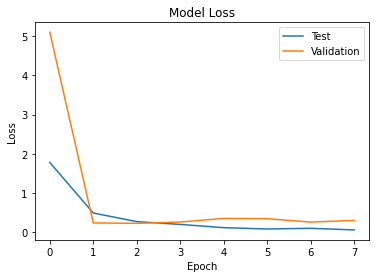

In [43]:
plt.plot(validate.history['loss'])
plt.plot(validate.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

# Plotting Testing and Validation Accuracies

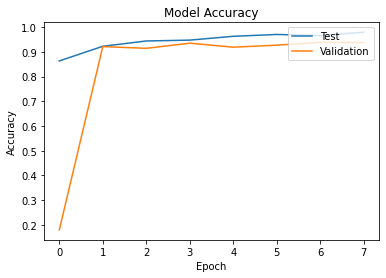

In [44]:
plt.plot(validate.history['acc'])
plt.plot(validate.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

# Predicting whether an image has brain tumour or not

In [45]:
def classify(classification):
    if classification==0:
        return 'there is a tumour!'
    else:
        return 'there is no tumour!'

0
[[0.7837747 0.2162253]]
78.37746739387512% Sure that there is a tumour!


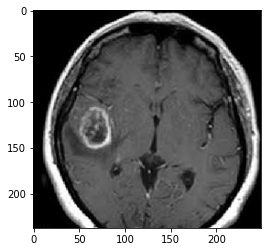

In [90]:
# With Segmentation

%matplotlib inline
from matplotlib.pyplot import imshow
from sklearn.cluster import KMeans
img = Image.open(r"/content/drive/My Drive/Colab Notebooks/BTD/brain_tumor_dataset/Testing/glioma_tumor/image(93).jpg")
# img = Image.open(r"/content/drive/My Drive/Colab Notebooks/BTD/brain_tumor_dataset/yes/Y4.jpg")



#tumor = img/255.0
X = np.array(img.resize((128,128)))
X = X.reshape(-1,3)
# X = img.reshape(-1,3)
km = KMeans (n_clusters = 3)
km.fit(X)
img_seg = km.cluster_centers_
img_seg = img_seg[km.labels_]
# imshow(img_seg)
x = img_seg.reshape(1,128,128,3)


# x = np.array(img.resize((128,128)))
# x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)

print(classification)
print(res)
print(str(res[0][classification]*100) + '% Sure that ' + classify(classification))

1
[[0.20973948 0.79026055]]
79.02605533599854% Sure that there is no tumour!


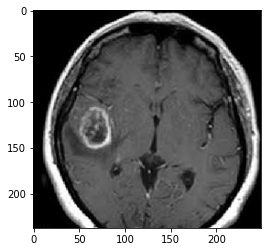

In [91]:
# Without segmentation

from matplotlib.pyplot import imshow
# img = Image.open(r"/content/drive/My Drive/Colab Notebooks/BTD/brain_tumor_dataset/yes/Y4.jpg")
img = Image.open(r"/content/drive/My Drive/Colab Notebooks/BTD/brain_tumor_dataset/Testing/glioma_tumor/image(93).jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)

print(classification)
print(res)
print(str(res[0][classification]*100) + '% Sure that ' + classify(classification))

89.74475264549255% Sure that there is no tumour!


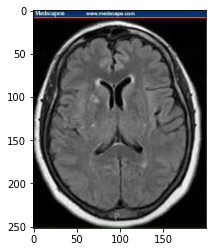

In [57]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/My Drive/Colab Notebooks/BTD/brain_tumor_dataset/no/31 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Sure that ' + classify(classification))